# Scraping hockey-reference.com

In [89]:
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup
from argparse import ArgumentParser
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
# Query the hockey-reference website for data and transform html into a readable table
html1 = urllib.request.urlopen("https://www.hockey-reference.com/leagues/NHL_2024_skaters.html#stats::points").read()
soup1 = BeautifulSoup(html1,"html.parser")

table1 = soup1.find_all('table')[0]
table_body1 = table1.find('tbody')
rows1 = table_body1.find_all('tr')

column_headers = ['Rk','Player','Age','Team','Pos','GP','G','A','PTS','+/-','PIM','EVG','PPG','SHG','GWG','EV','PP',
                  'SH','SOG','SPCT','TSA','TOI','ATOI','FOW','FOL','FO%','BL','HIT','TAKE','GIVE','Awards']

full_data = [[td1.getText() for td1 in rows1[i].find_all(['th','td'])]
            for i in range(len(rows1))]

In [91]:
df = pd.DataFrame(full_data, columns=column_headers)
df.describe()

,Rk,Player,Age,Team,Pos,GP,G,A,PTS,+/-,...,TOI,ATOI,FOW,FOL,FO%,BL,HIT,TAKE,GIVE,Awards
count,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,...,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169
unique,1169,1022,24,35,16,84,51,71,99,79,...,1159,742,247,252,247,168,205,77,82,128
top,1,Anthony Beauvillier,25,2TM,D,82,0,0,0,0,...,60:00,11:17,0,0,,0,0,0,0,
freq,1,4,114,70,371,106,321,216,184,209,...,3,6,581,548,533,152,129,181,117,1017


In [92]:
# Cleaning up goalies
df = df[df.Pos != 'G']
df.describe()

,Rk,Player,Age,Team,Pos,GP,G,A,PTS,+/-,...,TOI,ATOI,FOW,FOL,FO%,BL,HIT,TAKE,GIVE,Awards
count,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,...,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
unique,1065,924,24,35,15,84,51,71,99,79,...,1057,651,247,252,247,168,205,77,82,112
top,1,Anthony Beauvillier,25,2TM,D,82,0,0,0,0,...,978:26,11:17,0,0,,0,1,0,0,
freq,1,4,107,67,371,106,218,154,123,105,...,2,6,477,444,429,48,28,113,109,935


# Faceoffs

<AxesSubplot:xlabel='FOW', ylabel='Count'>

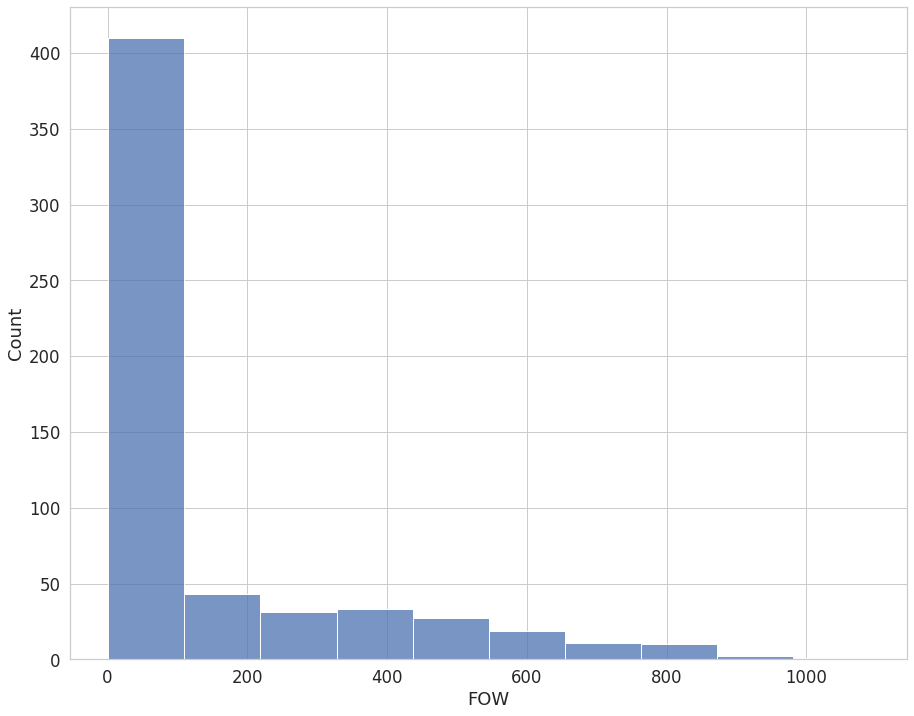

In [93]:
#Understanding distribution of FOW to arrive at a cut-off
df.FOW = pd.to_numeric(df.FOW)
sns.histplot(data=df[df.FOW != 0], x="FOW", bins=10)

<AxesSubplot:xlabel='FO%'>

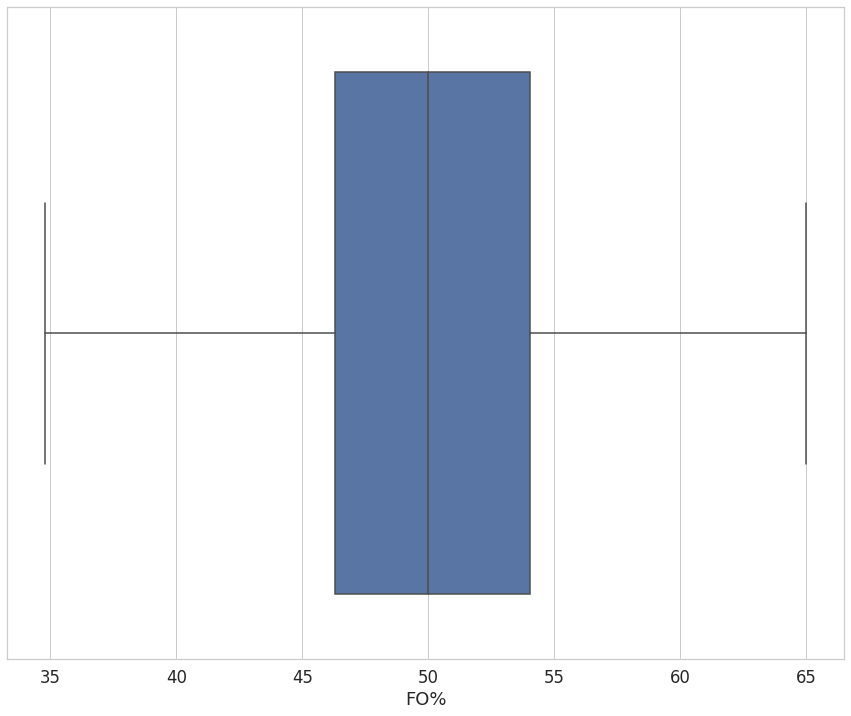

In [94]:
df['FO%'] = pd.to_numeric(df['FO%'])
fo_df = df[df.FOW>=100]
sns.boxplot(x="FO%", data=fo_df)

In [95]:
df[(df['FO%']>=55) & (df.FOW>=100)].sort_values(by='FO%', ascending=False)

,Rk,Player,Age,Team,Pos,GP,G,A,PTS,+/-,...,TOI,ATOI,FOW,FOL,FO%,BL,HIT,TAKE,GIVE,Awards
447,448,Michael McLeod,25,NJD,C,45,10,9,19,6,...,681:29,15:09,424.0,228,65.0,22,101,20,18,
521,522,Jeff Carter,39,PIT,C,72,11,4,15,-7,...,905:05,12:34,265.0,159,62.5,33,83,23,20,Byng-32
89,90,Jamie Benn,34,DAL,LW,82,21,39,60,8,...,1239:50,15:07,436.0,276,61.2,50,110,49,33,Selke-27
573,574,Nico Sturm,28,SJS,C,63,5,8,13,-25,...,923:32,14:40,497.0,330,60.1,39,75,21,18,
74,75,John Tavares,33,TOR,C,80,29,36,65,2,...,1429:12,17:52,802.0,550,59.3,37,134,37,51,
31,32,Vincent Trocheck,30,NYR,C,82,25,52,77,16,...,1759:17,21:27,881.0,619,58.7,86,175,50,36,Selke-16
275,276,Elias Lindholm,29,VAN,C,26,6,6,12,-6,...,460:20,17:42,206.0,145,58.7,21,33,12,5,
13,14,Sidney Crosby,36,PIT,C,82,42,52,94,7,...,1647:07,20:05,1090.0,782,58.2,37,101,73,57,"AS-4,Byng-59,Hart-9,Selke-9"
290,291,Jordan Staal,35,CAR,C,80,10,20,30,-14,...,1230:18,15:23,799.0,576,58.1,41,142,25,28,"Byng-71,Selke-2"
77,78,Claude Giroux,36,OTT,C/LW,82,21,43,64,-14,...,1647:33,20:06,668.0,484,58.0,30,40,53,46,


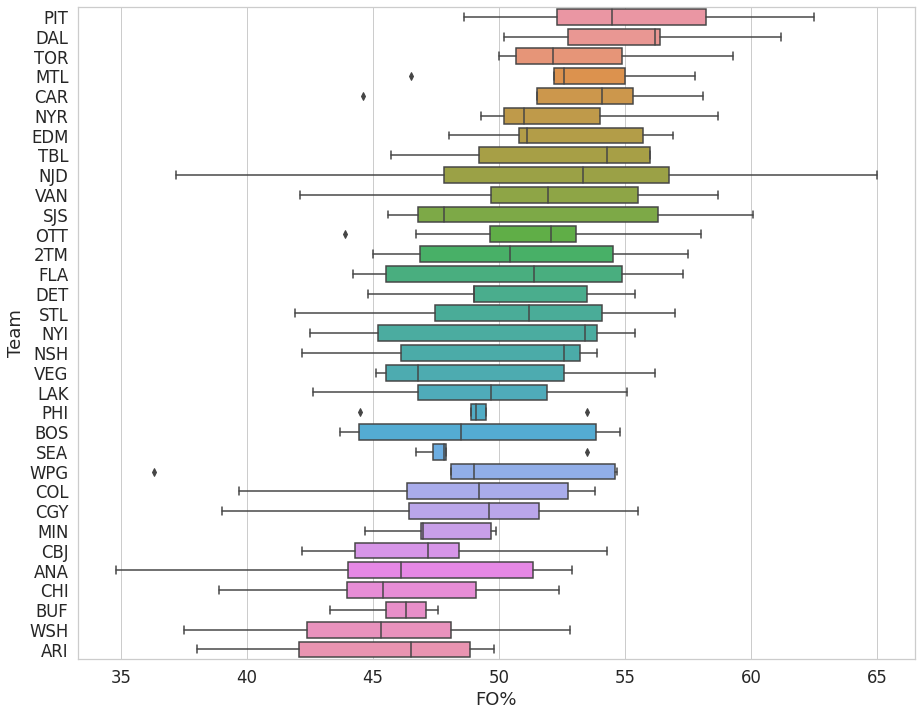

In [96]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.5, style='whitegrid')
order = fo_df.groupby(by=['Team'])['FO%'].mean().sort_values(ascending=False).index
sns.boxplot(y=fo_df['Team'], 
            x=fo_df['FO%'], 
            order=order)
plt.show()